# Project Specification

## Importing necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sn

Using TensorFlow backend.
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:

In [2]:
#Changing the current working directory to the specified path
os.chdir("D:/Ediwsor_Project - Bike_Rental_Count")

In [3]:
#Checking the current working directory's path
os.getcwd()

'D:\\Ediwsor_Project - Bike_Rental_Count'

In [4]:
# Loading the dataset into the python environment
bike_data = pd.read_csv("day.csv")

In [5]:
#Checking whether the data has been loaded into the Python environment or not.
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## EXPLORATORY DATA ANALYSIS

In [6]:
#Fetching the count of rows and columns in the dataset
bike_data.shape

(731, 16)

In [7]:
#Checking the distribution of data in the dataset
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#Analyzing the values of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
#Checking for the datatypes of every data column in the dataset
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
# Checking for the presence of unique values to categorize the data variables into numeric and categorical variables
bike_data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [11]:
bike_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [12]:
bike_data['yr'].unique()

array([0, 1], dtype=int64)

In [13]:
bike_data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [14]:
bike_data['holiday'].unique()

array([0, 1], dtype=int64)

In [15]:
bike_data['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [16]:
bike_data['workingday'].unique()

array([0, 1], dtype=int64)

In [17]:
bike_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

#### From the above exploration of data variables, it can be clearly understood that the data variables [season,yr,mnth,holiday,weekday,workingday and weathersit] are actually categorical data values.
Thus, we need to analyze and convert the datatypes of the input dataset to the required datatypes.

In [18]:
#Converting the datatypes of the columns of dataset to the required/essential datatypes
bike_data['season']=bike_data['season'].astype(str)
bike_data['yr']=bike_data['yr'].astype(str)
bike_data['mnth']=bike_data['mnth'].astype(str)
bike_data['holiday']=bike_data['holiday'].astype(str)
bike_data['weekday']=bike_data['weekday'].astype(str)
bike_data['workingday']=bike_data['workingday'].astype(str)
bike_data['weathersit']=bike_data['weathersit'].astype(str)
bike_data['dteday']=pd.to_datetime(bike_data['dteday'])

In [19]:
#Check whether the datatypes have been updated or not
bike_data.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

From the above data columns, now will check the effect of certain variables on the dependent variable and decide whether to restore or drop those data columns

In [20]:
#Extracting the day values from the date and storing into a new column - 'day'
bike_data['day'] = bike_data['dteday'].dt.day

In [21]:
bike_data['day']

0       1
1       2
2       3
3       4
4       5
       ..
726    27
727    28
728    29
729    30
730    31
Name: day, Length: 731, dtype: int64

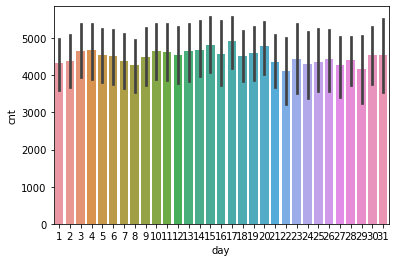

In [22]:
sn.barplot(x=bike_data['day'],y=bike_data['cnt'])

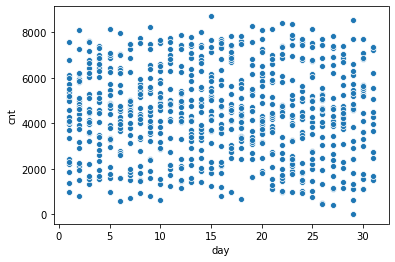

In [23]:
sn.scatterplot(x=bike_data['day'],y=bike_data['cnt'])

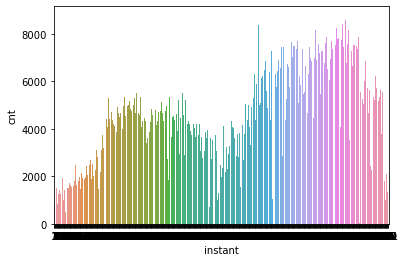

In [24]:
sn.barplot(x=bike_data['instant'],y=bike_data['cnt'])

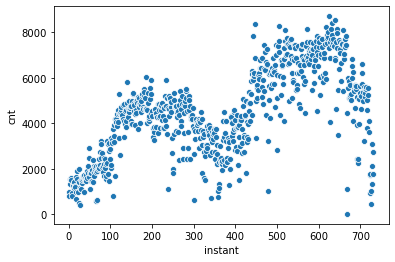

In [25]:
sn.scatterplot(x=bike_data['instant'],y=bike_data['cnt'])

# Insights from the above data distribution 

#### 1. From the above visualization, it is pretty clear that the data columns 'day' and 'instant' do not contribute to the dependent variable 'cnt' and happen to have NO relationship between them. Thus, we can drop the data columns 'day' and 'instant' from the dataset.

#### 2. Further, the data column 'dteday' represents information about the 'day', 'month' and 'year'. But, the data columns 'mnth' and 'yr' are separately present in the data set to give information about the same. Thus, it makes us applicable to drop the data column 'dteday'.

#### 3. The data variables 'casual' and 'registered' is actually combined to form the data variable 'cnt' which is also the dependent variable of the dataset. Thus, it makes us applicable to drop the data columns 'casual' and 'registered'.

In [26]:
#Dropping the above mentioned data columns from the dataset
bike_data=bike_data.drop(['day','instant','dteday','casual','registered'],axis=1)

In [27]:
print(bike_data.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [28]:
bike_data.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [29]:
bike_data.shape

(731, 12)

# MISSING VALUE ANALYSIS

In [30]:
#Checking for the presence of missing values
bike_data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

From the above result, it is clear that the dataset contains NO Missing Values.

# OUTLIER ANALYSIS -- DETECTION

1. Outliers in the data values exists only in continuous/numeric form of data variables. Thus, we need to store all the numeric and categorical independent variables into a separate array structure.

In [31]:
numeric_col = ['temp','atemp','hum','windspeed']
categorical_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

In [32]:
numeric_col

['temp', 'atemp', 'hum', 'windspeed']

2. Using BoxPlot to detect the presence of outliers in the numeric/continuous data columns.

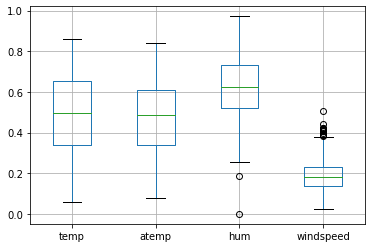

In [33]:
bike_data.boxplot(numeric_col)

3. From the above visualization, it is clear that the data variables 'hum' and 'windspeed' contains outliers in the data values.

# OUTLIER ANALYSIS -- Removal of Outliers

1. From the boxplot, we have identified the presence of outliers. That is, the data values that are present above the upper quartile and below the lower quartile can be considered as the outlier data values.
2. Now, we will replace the outlier data values with NULL.

In [34]:
#Replacing the outlier data values with NULL
for x in ['hum','windspeed']:
    q75,q25 = np.percentile(bike_data.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    bike_data.loc[bike_data[x] < min,x] = np.nan
    bike_data.loc[bike_data[x] > max,x] = np.nan

In [35]:
#Checking whether the outliers in the above defined columns are replaced by NULL or not
bike_data.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

## Thus, we choose choose to drop the data rows consisting of NULL values

In [36]:
bike_data = bike_data.dropna(axis = 0)

In [37]:
#Checking for the presence of NULL values
bike_data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

# DATA VISUALIZATION -- Numeric variables of the dataset

In [38]:
numeric_col

['temp', 'atemp', 'hum', 'windspeed']

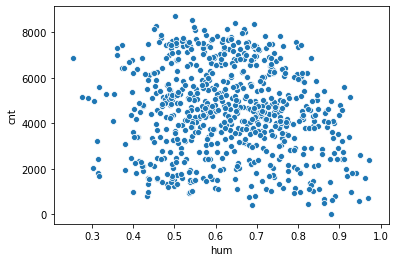

In [39]:
sn.scatterplot(x=bike_data['hum'],y=bike_data['cnt'])

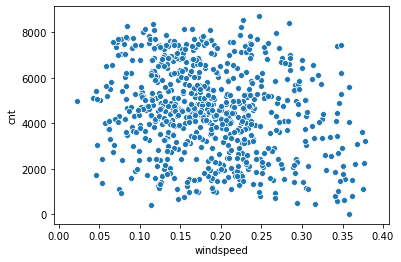

In [40]:
sn.scatterplot(x=bike_data['windspeed'],y=bike_data['cnt'])

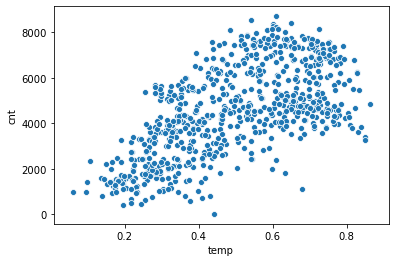

In [41]:
sn.scatterplot(x=bike_data['temp'],y=bike_data['cnt'])

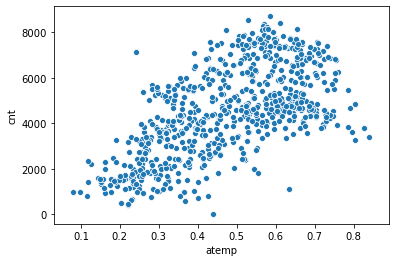

In [42]:
sn.scatterplot(x=bike_data['atemp'],y=bike_data['cnt'])

#### From the above data visualization, it is clear that the data variables 'temp' and 'atemp' are related to each other. Further, the data is free from outliers.

# DATA VISUALIZATION -- Categorical Variables of the dataset

In [43]:
categorical_col

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

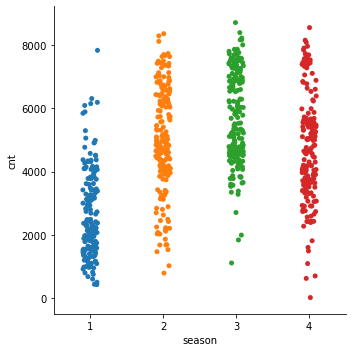

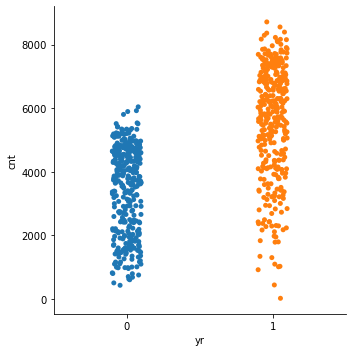

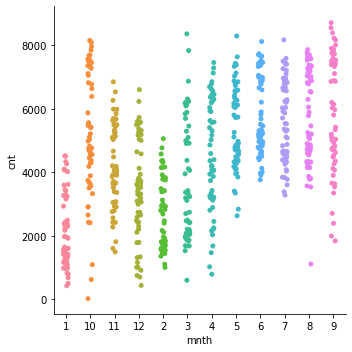

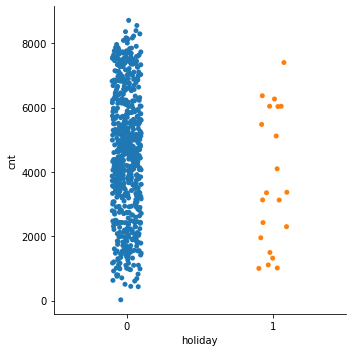

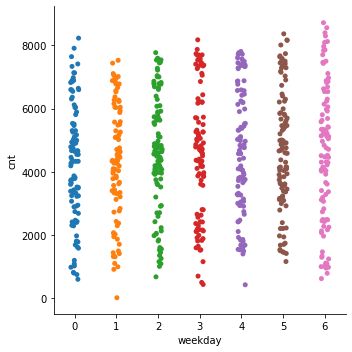

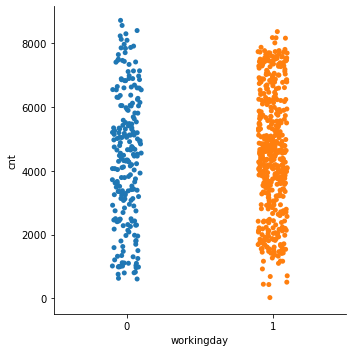

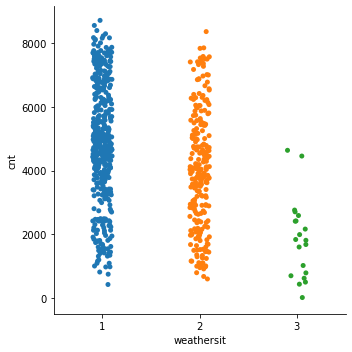

In [44]:
#Catplot of season agaisnt cnt
for i in categorical_col:
    sn.catplot(x = i, y = "cnt", data=bike_data)


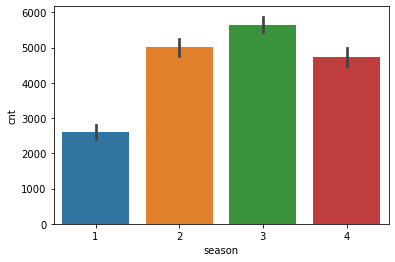

In [45]:
sn.barplot(x="season",y="cnt",data=bike_data)

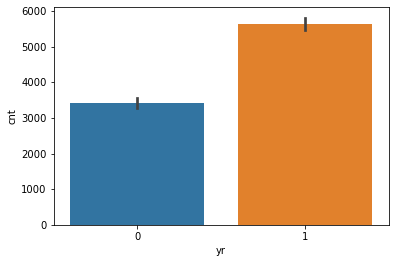

In [46]:
sn.barplot(x="yr",y="cnt",data=bike_data)

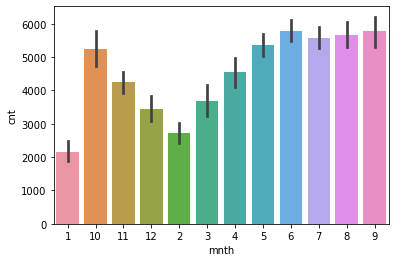

In [47]:
sn.barplot(x="mnth",y="cnt",data=bike_data)

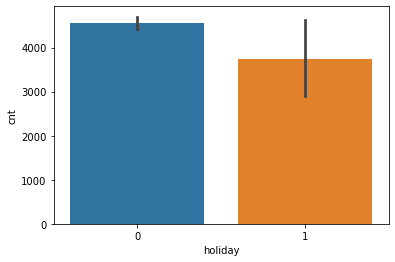

In [48]:
sn.barplot(x="holiday",y="cnt",data=bike_data)

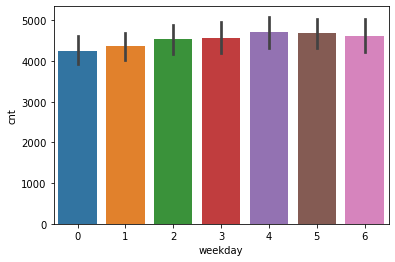

In [49]:
sn.barplot(x="weekday",y="cnt",data=bike_data)

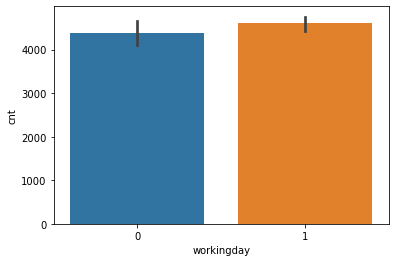

In [50]:
sn.barplot(x="workingday",y="cnt",data=bike_data)

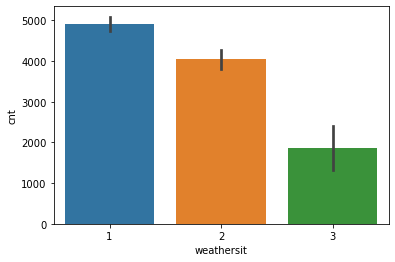

In [51]:
sn.barplot(x="weathersit",y="cnt",data=bike_data)

## From the above data visualization, following insights can be drawn--

#### 1. Season 2,3 and 4 has observed high count of Bikes on rent as compared to Season 1. Moreover, Season 3 is observed to have the highest count of Bikes on rent.
#### 2. Year 1 is observed to have high count of Bikes on rent that in year 0
#### 3. On a holiday, the bike rental count is less as compared to a non-holiday
#### 4. The month values between 3-10 has considerably a good count of bikes on rent
#### 5. The count of Bikes on Rent is the high between the weekdays 2-5, with weekday = 5 having the Highest count and weekday = 0 having the lowest count
#### 6. The count of Bikes on Rent is the highest on a workingday(neither a weekend nor a holiday)
#### 7. The weather Type 1 i.e. weathersit = 1, has the highest count of bikes on rent

# Data Visulization of multiple data coulmns together

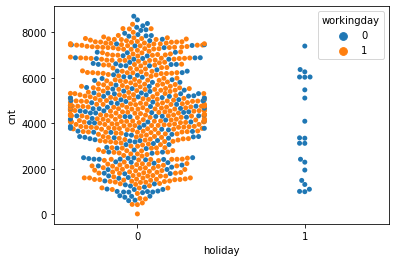

In [52]:
sn.swarmplot(x='holiday',y='cnt',data=bike_data,hue='workingday',size=5)

#### From the above plot, we can say that the bike rental count is the highest when the day is not a holiday(holiday = 0) and when the day is a workingday(not a weekend or a holiday i.e. workingday=1)

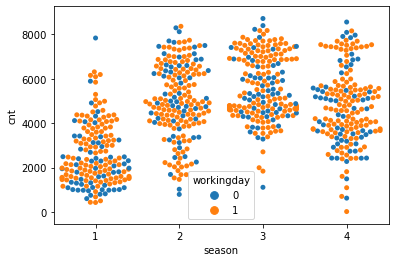

In [53]:
sn.swarmplot(x='season',y='cnt',data=bike_data,hue='workingday',size=5)

#### From the above plot, we can say that the bike rental count is the high when the season is 2 or 3 or 4 and when the day is a workingday(not a weekend or a holiday i.e. workingday=1)

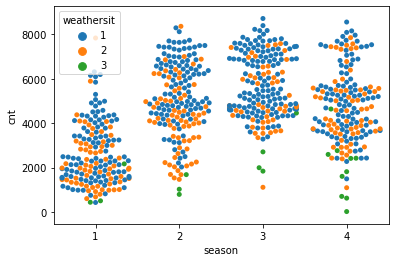

In [54]:
sn.swarmplot(x='season',y='cnt',data=bike_data,hue='weathersit',size=5)

#### From the above plot, we can say that the bike rental count is the high when the season is 2 or 3 or 4 and when the weather type is 1.

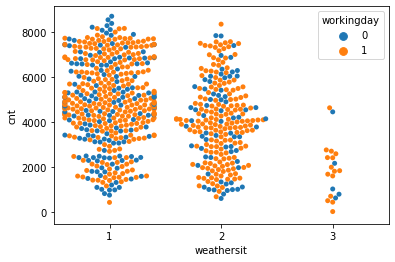

In [55]:
sn.swarmplot(x='weathersit',y='cnt',data=bike_data,hue='workingday',size=5)

#### From the above plot, we can say that the overall bike rental count is the maximum when the weathersit is of type 1, and when it is a  workingday(workingday=1)

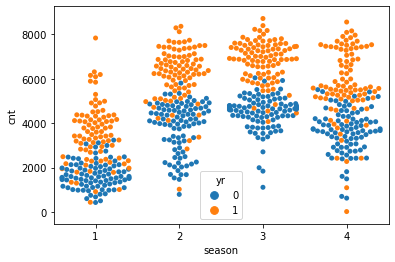

In [56]:
sn.swarmplot(x='season',y='cnt',data=bike_data,hue='yr',size=5)

#### From the above plot, we can say that the overall bike rental count is the maximum for the season 2,3,4, and for the year = 1

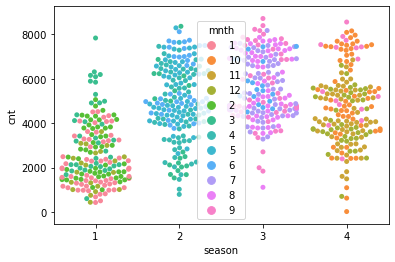

In [57]:
sn.swarmplot(x='season',y='cnt',data=bike_data,hue='mnth',size=5)

#### From the above plot, we can say that the overall bike rental count is the maximum for the season 2,3,4, and for the months between 3-10

# FEATURE SELECTION -- Selecting features from Numeric/Continuous independent variables

In [58]:
numeric_col #numeric/continuous variables of the dataset

['temp', 'atemp', 'hum', 'windspeed']

In [59]:
#Using Correlation analysis to depict the relationship between the numeric/continuous data variables
corr_matrix = bike_data.loc[:,numeric_col].corr()
print(corr_matrix)

               temp     atemp       hum  windspeed
temp       1.000000  0.991738  0.114191  -0.140169
atemp      0.991738  1.000000  0.126587  -0.166038
hum        0.114191  0.126587  1.000000  -0.204496
windspeed -0.140169 -0.166038 -0.204496   1.000000


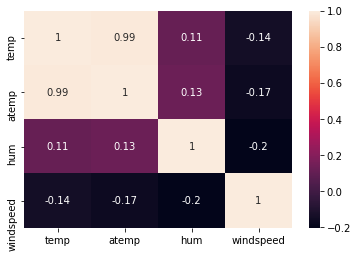

In [60]:
#Using heatmap to visualize the correlation matrix and understand the relationship between the numeric variables
sn.heatmap(corr_matrix, annot=True)

In [61]:
# Multi-collinearity check -- VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_data = add_constant(bike_data.loc[:,numeric_col])
pd.Series([variance_inflation_factor(VIF_data.values, x) 
               for x in range(VIF_data.shape[1])], 
              index=VIF_data.columns)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        46.436329
temp         63.325618
atemp        63.933104
hum           1.056525
windspeed     1.101885
dtype: float64

#### From the above correlation analysis and heatmap, it is clear that the numeric variables 'temp' and 'atemp' are highly co-related to each other i.e. they serve or depict the same information.
#### Moreover, from the VIF test, it is clear that temp and atemp share high level of correlation and is a threat in terms of multi-collinearity.
#### Thus, it makes us applicable to drop any one of those data variables.
#### So, we drop the 'atemp' variable from the dataset.

In [62]:
bike_data = bike_data.drop(['atemp'],axis=1)

In [63]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# FEATURE SELECTION -- Selecting features from Categorical independent variables

In [64]:
categorical_col =['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'] #categorical variables of the dataset

In [65]:
categorical_col

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for x in categorical_col:
    model = ols('cnt' + '~' + x, data = bike_data).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)
   

             df        sum_sq       mean_sq           F        PR(>F)
season      3.0  9.218466e+08  3.072822e+08  124.840203  5.433284e-65
Residual  713.0  1.754981e+09  2.461404e+06         NaN           NaN
             df        sum_sq       mean_sq           F        PR(>F)
yr          1.0  8.813271e+08  8.813271e+08  350.959951  5.148657e-64
Residual  715.0  1.795501e+09  2.511190e+06         NaN           NaN
             df        sum_sq       mean_sq          F        PR(>F)
mnth       11.0  1.042307e+09  9.475520e+07  40.869727  2.557743e-68
Residual  705.0  1.634521e+09  2.318469e+06        NaN           NaN
             df        sum_sq       mean_sq        F    PR(>F)
holiday     1.0  1.377098e+07  1.377098e+07  3.69735  0.054896
Residual  715.0  2.663057e+09  3.724555e+06      NaN       NaN
             df        sum_sq       mean_sq         F    PR(>F)
weekday     6.0  1.757122e+07  2.928537e+06  0.781896  0.584261
Residual  710.0  2.659257e+09  3.745432e+06       NaN   

#### From the ANOVA Test analysis, it is clear that the variables ['workingday'and 'weekday'] have p-values > 0.05. Thus, we drop these data variables

In [67]:
bike_data = bike_data.drop(['weekday','workingday'],axis=1)

In [68]:
bike_data.dtypes

season         object
yr             object
mnth           object
holiday        object
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

# FEATURE SCALING -- SCALING DATA TO A NORMALIZED FORM
## Before applying feature scaling techniques, we need to check whether the data is normalized or not. 
### If the data is found to be normalized, we do not apply any scaling to it.
### If the data is found to be skewed i.e. not in a normalized form, then we apply scaling technique to scale the data.


## Techniques to check for Normalization of the dataset
### 1. Histogram plot
### 2. Distplot
### 3. Skewness Test

In [69]:
numeric_col_updated = ['temp','hum','windspeed']

In [70]:
numeric_col_updated

['temp', 'hum', 'windspeed']

In [71]:
#Skewness Test
from scipy.stats import skew
for x in numeric_col_updated:
    print(x)
    skew_test = skew(bike_data.loc[:,x])
    print(skew_test)

temp
-0.0690698243507108
hum
0.05235661609568474
windspeed
0.4400548001440976


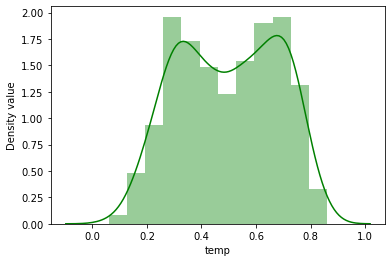

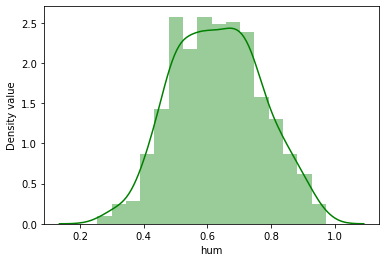

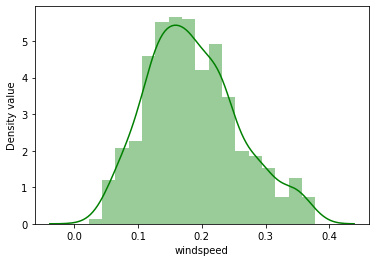

In [72]:
# DistPlot to check for Normalization of data
for x in numeric_col_updated:
    sn.distplot(bike_data[x],color = 'green')
    plt.ylabel("Density value")
    plt.show()

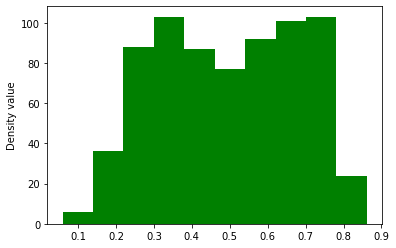

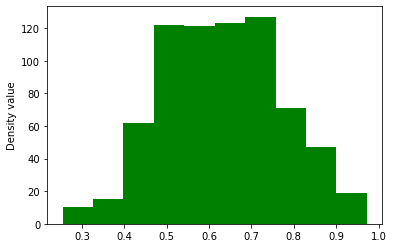

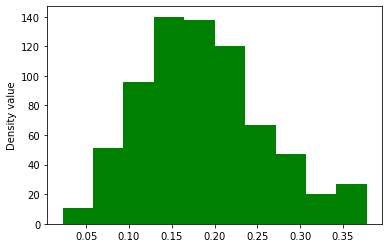

In [73]:
# Histogram to check for Normalization of data
for x in numeric_col_updated:
    plt.hist(bike_data[x],color = 'green')
    plt.ylabel("Density value")
    plt.show()

### From the above Skewness Test, DistPlot and Histogram Plot of all the Continuous Variables, it is clear that the data is NORMALLY DISTRIBUTED.
### Hence, we need not apply any scaling technique.


## So, after data pre-processing, the following insights canbe drawn from the data:
### 1. The dataset contains 9 data variables (8 indepedent variables and 1 dependent variable).
### 2. The dependent variable(cnt) is a continuous variable.
### 3. Thus, it is a REGRESSION type of Business Problem Statement.

# SAMPLING OF DATA -- Splitting of Data columns into Training and Test dataset

In [74]:
bike = bike_data.copy()

In [75]:
categorical_col_updated = ['season','yr','mnth','weathersit','holiday']

In [76]:
bike = pd.get_dummies(bike, columns = categorical_col_updated) 


In [77]:
bike

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_1,weathersit_2,weathersit_3,holiday_0,holiday_1
0,0.344167,0.805833,0.160446,985,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,801,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.652917,0.350133,2114,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
727,0.253333,0.590000,0.155471,3095,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
728,0.253333,0.752917,0.124383,1341,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
729,0.255833,0.483333,0.350754,1796,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [78]:
categorical_col_updated

['season', 'yr', 'mnth', 'weathersit', 'holiday']

In [79]:
bike.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_10', 'mnth_11', 'mnth_12',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'holiday_0',
       'holiday_1'],
      dtype='object')

In [80]:
#Separating the depenedent and independent data variables into two dataframes.
from sklearn.model_selection import train_test_split 
X = bike.drop(['cnt'],axis=1) 
Y = bike['cnt']

In [81]:
X # Independent variables

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_1,weathersit_2,weathersit_3,holiday_0,holiday_1
0,0.344167,0.805833,0.160446,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0.196364,0.437273,0.248309,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0.200000,0.590435,0.160296,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0.226957,0.436957,0.186900,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0.652917,0.350133,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
727,0.253333,0.590000,0.155471,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
728,0.253333,0.752917,0.124383,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
729,0.255833,0.483333,0.350754,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [82]:
Y # Dependent variable

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 717, dtype: int64

In [83]:
# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [84]:
X_train

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_1,weathersit_2,weathersit_3,holiday_0,holiday_1
696,0.291667,0.786667,0.237562,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
17,0.216667,0.861667,0.146775,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
271,0.616667,0.699167,0.172883,0,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,1,0
324,0.447500,0.910000,0.138054,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
370,0.334167,0.542083,0.167908,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,0.326667,0.556667,0.374383,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
197,0.719167,0.604167,0.245033,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
641,0.657500,0.793750,0.066546,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
571,0.724167,0.450000,0.164800,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [85]:
X_test

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_1,weathersit_2,weathersit_3,holiday_0,holiday_1
345,0.238333,0.670833,0.063450,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
147,0.655833,0.729583,0.230092,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
248,0.540000,0.886957,0.343943,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
241,0.639167,0.548333,0.125008,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
483,0.376667,0.489583,0.129975,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.348333,0.734583,0.092054,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
102,0.412500,0.819167,0.250617,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
518,0.583333,0.549167,0.186562,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
715,0.362500,0.838750,0.100742,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [86]:
Y_train

696    3959
17      683
271    4839
324    2765
370    4098
       ... 
720    3623
197    5302
641    7572
571    8173
697    5260
Name: cnt, Length: 573, dtype: int64

In [87]:
Y_test

345    3310
147    4758
248    2710
241    5204
483    4220
       ... 
309    3649
102    2162
518    8120
715    3786
316    3717
Name: cnt, Length: 144, dtype: int64

# MODELLING OF DATA USING MACHINE LEARNING ALGORITHMS

### Defining error metrics to check the error rate and accuracy of the Regression ML algorithms

### 1. MEAN ABSOLUTE PERCENTAGE ERROR (MAPE)

In [88]:
import numpy as np
def MAPE(Y_actual,Y_Predicted):
    Mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return Mape

### 2. R SQUARE error metric -- Coefficient of Determination

In [89]:
import numpy as np
from sklearn import metrics
def R_square(Y_actual,Y_Predicted):
    R_sq = metrics.r2_score(Y_actual,Y_Predicted)
    return R_sq

# MODEL 1: LINEAR REGRESSION

In [90]:
#Building the Linear Regression Model on our dataset
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(X_train , Y_train)

In [91]:
LR_Train_predict = linear_model.predict(X_train) #Predictions on Training data

In [92]:
LR_Test_predict = linear_model.predict(X_test) #Predictions on Testing data

In [93]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE = MAPE(Y_test,LR_Test_predict)

In [94]:
# Using R-SQUARE error metrics to check for the error rate and accuracy level
LR_R = R_square(Y_test,LR_Test_predict)

In [95]:
Accuracy = 100 - LR_MAPE

In [96]:
print("MAPE: ",LR_MAPE)
print("R-Square: ",LR_R)
print('Accuracy of Linear Regression: {:0.2f}%.'.format(Accuracy))

MAPE:  16.628873360270358
R-Square:  0.8762342338488462
Accuracy of Linear Regression: 83.37%.


# MODEL 2: DECISION TREE

In [97]:
#Building the Decision Tree Model on our dataset
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

In [98]:
DT_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [99]:
DT_predict = DT_model.predict(X_test) #Predictions on Testing data

In [100]:
# Using MAPE error metrics to check for the error rate and accuracy level
DT_MAPE = MAPE(Y_test,DT_predict)

In [101]:
# Using R-SQUARE error metrics to check for the error rate and accuracy level
DT_R = R_square(Y_test,DT_predict)

In [102]:
Accuracy_DT = 100 - DT_MAPE

In [103]:
print("MAPE: ",DT_MAPE)
print("R-Square: ",DT_R)
print('Accuracy of Decision Tree model: {:0.2f}%.'.format(Accuracy_DT))

MAPE:  18.412072492598107
R-Square:  0.8716432119039883
Accuracy of Decision Tree model: 81.59%.


# MODEL 3: RANDOM FOREST

In [104]:
#Building the Decision Tree Model on our dataset
from sklearn.ensemble import RandomForestRegressor
Random_model = RandomForestRegressor(n_estimators=300).fit(X_train,Y_train)

In [105]:
Random_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [106]:
Random_predict = Random_model.predict(X_test) #Predictions on Testing data

In [107]:
# Using MAPE error metrics to check for the error rate and accuracy level
Random_MAPE = MAPE(Y_test,Random_predict)

In [108]:
# Using R-SQUARE error metrics to check for the error rate and accuracy level
Random_R = R_square(Y_test,Random_predict)

In [109]:
Accuracy_Random = 100 - Random_MAPE

In [110]:
print("MAPE: ",Random_MAPE)
print("R-Square: ",Random_R)
print('Accuracy of Random Forest model: {:0.2f}%.'.format(Accuracy_Random))

MAPE:  15.831497772607984
R-Square:  0.9202142965813019
Accuracy of Random Forest model: 84.17%.


# MODEL 4: KNN Algorithm

In [111]:
#Building the KNN Model on our dataset
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,Y_train)

In [112]:
KNN_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [113]:
KNN_predict = KNN_model.predict(X_test) #Predictions on Testing data

In [114]:
# Using MAPE error metrics to check for the error rate and accuracy level
KNN_MAPE = MAPE(Y_test,KNN_predict)

In [115]:
# Using R-SQUARE error metrics to check for the error rate and accuracy level
KNN_R = R_square(Y_test,KNN_predict)

In [116]:
Accuracy_KNN = 100 - KNN_MAPE

In [117]:
print("MAPE: ",KNN_MAPE)
print("R-Square: ",KNN_R)
print('Accuracy of KNN model: {:0.2f}%.'.format(Accuracy_KNN))

MAPE:  17.443668778014253
R-Square:  0.8827864825099236
Accuracy of KNN model: 82.56%.


In [118]:
bike.shape

(717, 27)

# MODEL 5: GRADIENT BOOSTED TREES

In [119]:
#Building the GRADIENT BOOSTED Model on our dataset
from sklearn.ensemble import GradientBoostingRegressor 
GB_model = GradientBoostingRegressor().fit(X_train, Y_train)

In [120]:
GB_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [121]:
GB_predict = GB_model.predict(X_test) #Predictions on Testing data

In [122]:
# Using MAPE error metrics to check for the error rate and accuracy level
GB_MAPE = MAPE(Y_test,GB_predict)

In [123]:
# Using R-SQUARE error metrics to check for the error rate and accuracy level
GB_R = R_square(Y_test,GB_predict)

In [124]:
Accuracy_GB = 100 - GB_MAPE

In [125]:
print("MAPE: ",GB_MAPE)
print("R-Square: ",GB_R)
print('Accuracy of Gradient Boosted Tree model: {:0.2f}%.'.format(Accuracy_GB))

MAPE:  15.113203510403997
R-Square:  0.9114435226186516
Accuracy of Gradient Boosted Tree model: 84.89%.


# HYPER PARAMETER TUNING -- Using RandomizedSearchCV

In [126]:
# Applying RandomizedSearchCV on Gradient Boosted tree Model
from sklearn.model_selection import RandomizedSearchCV
GBT = GradientBoostingRegressor(random_state = 0)
max_depth = list(range(1,20,2))
n_estimators = list(range(100,200,2))

# Creating a random grid of Hyper Parameters
GBT_GRID = {'n_estimators': n_estimators, 'max_depth': max_depth}
# Building a RandomSearch Cross Validated model over Random Forest Model
GB_CV = RandomizedSearchCV(GBT, param_distributions = GBT_GRID, n_iter = 5, cv = 5, random_state=0).fit(X_train, Y_train)
# Best Parameters of the Gradient Boosted Tree Model
Best_GB = GB_CV.best_params_
print("BEST PARAMETERS OF GRADIENT BOOSTED TREE MODEL:",Best_GB)
Best_GB_Estimator = GB_CV.best_estimator_
print("BEST ESTIMATORS OF GRADIENT BOOSTED TREE MODEL:",Best_GB_Estimator)
# Prediction on the test dataset
GB_predict = Best_GB_Estimator.predict(X_test)
# MAPE -- Error Metrics
GB_MAPE = MAPE(Y_test,GB_predict)
GB_R = R_square(Y_test,GB_predict)
Accuracy_GB_CV = 100 - GB_MAPE
print("MAPE: ",GB_MAPE)
print("R-Square: ",GB_R)
print('Accuracy of GRADIENT BOOSTED TREE model after performing Hyper_parameter tuning: {:0.2f}%.'.format(Accuracy_GB_CV))

BEST PARAMETERS OF GRADIENT BOOSTED TREE MODEL: {'n_estimators': 134, 'max_depth': 5}
BEST ESTIMATORS OF GRADIENT BOOSTED TREE MODEL: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=134,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MAPE:  14.675009390370574
R-Square:  0.9256064462497648
Accuracy of GRADIENT BOOSTED TREE model after performing Hyper_parameter tuning: 85.32%.


In [127]:
##Create a dataframe for actual values and predicted values
Bike_result = pd.DataFrame({'Actual_count': Y_test, 'Predicted_count':GB_predict})
Bike_result

,Actual_count,Predicted_count
345,3310,2689.575221
147,4758,4733.384757
248,2710,2050.504581
241,5204,5298.539272
483,4220,4975.781045
...,...,...
309,3649,3533.239284
102,2162,2367.657370
518,8120,7194.506690
715,3786,3210.484359


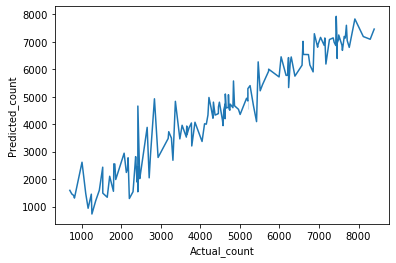

In [128]:
#Plot of actual values v/s predicted values by the model
sn.lineplot(x=Bike_result['Actual_count'],y=Bike_result['Predicted_count'],data=Bike_result)

In [129]:
Bike_result.to_csv("BIKE_RESULT.csv",index=False)